In [11]:
# Modules used for data handling and manipulation
import numpy as np
import pandas as pd

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Module used for pearson correlation
from scipy.stats.stats import pearsonr  
from statsmodels.tsa.stattools import adfuller 

# Modules used for preprocessing
from datetime import datetime
import preprocess
import pprint

# Module for suppressing warnings.
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_ = preprocess.preprocess("electricity")

In [3]:
df_.head()

,timestamp,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA 1: Proportion of zeros

In [14]:
df = df_.set_index('timestamp')
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
zero_prop = np.array([(df[col] == 0).sum() for col in df.columns])/df.shape[0]
clients = np.arange(1, 371)

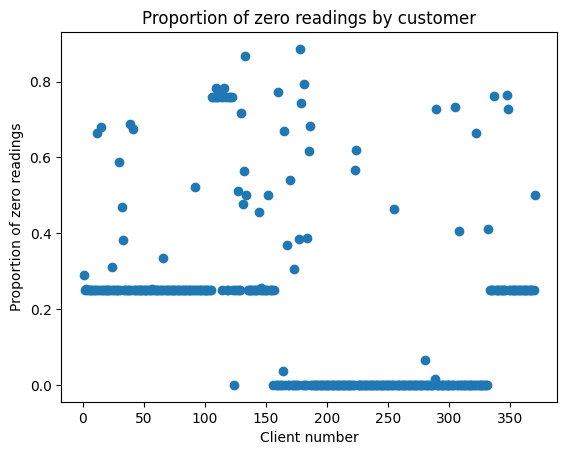

In [17]:
plt.figure(1)
plt.scatter(clients, zero_prop)
plt.xlabel('Client number')
plt.ylabel('Proportion of zero readings')
plt.title("Proportion of zero readings by customer")
plt.show()

In [18]:
(zero_prop > 0.4).sum()

np.int64(49)

In [19]:
df.index = pd.to_datetime(df.index)

In [20]:
s = df.MT_001
s.index[s != 0][0]

Timestamp('2012-01-01 00:15:00')

In [21]:
start_date = np.array([df[col].index[df[col] != 0][0] for col in df.columns])

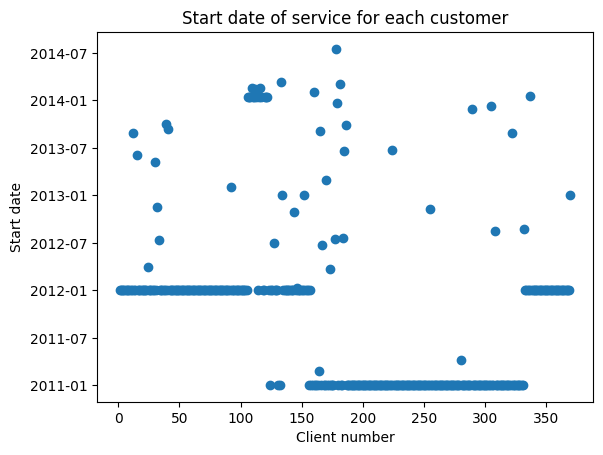

In [22]:
plt.figure(2)
plt.scatter(clients, start_date)
plt.xlabel('Client number')
plt.ylabel('Start date')
plt.title("Start date of service for each customer")
plt.show()

# EDA 2: Newly added customers and correlation with weather

In [4]:
df = df_.copy()

In [5]:
cols = [i for i in df.columns if i != "timestamp"]
x = (df[cols] != float(0)).idxmax()
y = pd.DataFrame(df.loc[x, "timestamp"].value_counts()).reset_index()
y["year"] = pd.to_datetime(y.timestamp).dt.year

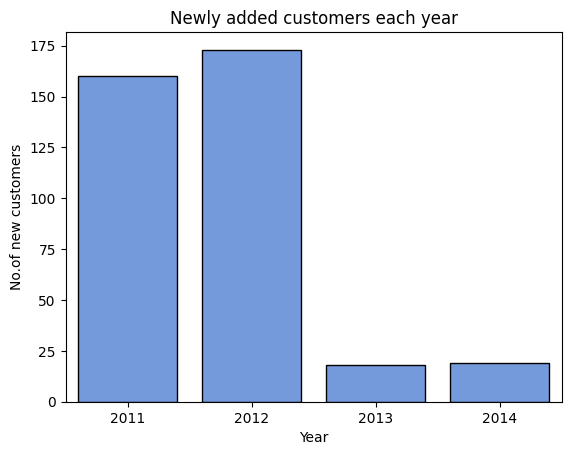

In [6]:
new_yearly_cust = y.groupby("year", as_index=False)["count"].sum()
sns.barplot(data = new_yearly_cust,
            x = "year",
            y = "count",
            color = "cornflowerblue",
            edgecolor = "black")
plt.title("Newly added customers each year")
plt.ylabel("No.of new customers")
plt.xlabel("Year")
plt.show()

In [7]:
temp = preprocess.preprocess("temperature")
precip = preprocess.preprocess("precipitation")

In [8]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["date"] = pd.to_datetime(df["timestamp"].dt.strftime("%m-%d-%Y"))
d = df.groupby(["date"]).sum("MT_001").sort_index()

In [9]:
d = d.reset_index(drop = True)

In [10]:
def qualitative_corr(cor):

    sign = None
    if cor < 0:
       sign = "negative"
    else:
       sign = "positive"

    cor = abs(cor)
    
    if 0 <= cor <= 0.19:
        return "very weak", sign
    elif 0.2 <= cor <= 0.39:
        return "weak", sign
    elif 0.4 <= cor <= 0.59:
        return "moderate", sign
    elif 0.6 <= cor <= 0.79:
        return "strong", sign
    return "very strong", sign

agg = {"feature": [], "magnitude": [], "sign": []}
yrs = [2011, 2012, 2013, 2014]

for i in d.columns:
    start_service_idx = (d[i] != 0).idxmax()
    elec_consump = d[i].values[start_service_idx:1461]
    max_temp = temp["tmax"].reset_index(drop = True).values[start_service_idx:]
    min_temp = temp["tmin"].reset_index(drop = True).values[start_service_idx:]
    preci = precip["precip"].reset_index(drop = True).values[start_service_idx:]

    
    _ = qualitative_corr(pearsonr(elec_consump, max_temp).statistic)
    agg["feature"].append("tmax")
    agg["magnitude"].append(_[0])
    agg["sign"].append(_[1])
    
    _= qualitative_corr(pearsonr(elec_consump, min_temp).statistic)
    agg["feature"].append("tmin")
    agg["magnitude"].append(_[0])
    agg["sign"].append(_[1])
    
    _ = qualitative_corr(pearsonr(elec_consump, preci).statistic)
    agg["feature"].append("precip")
    agg["magnitude"].append(_[0])
    agg["sign"].append(_[1])

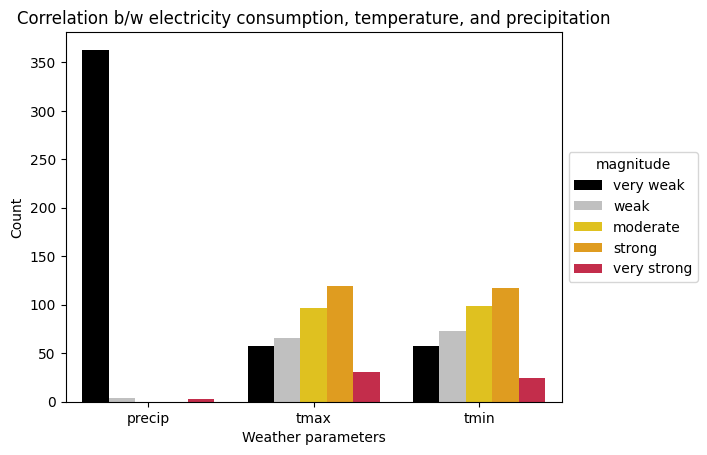

In [11]:
corr = pd.DataFrame.from_dict(agg)
corr_agg = corr[["feature", "magnitude"]].value_counts().reset_index()
ordinal_order = ["very weak", "weak", "moderate", "strong", "very strong"]
colors = ["crimson", "orange", "gold", "silver", "black"]

palette = dict(zip(ordinal_order, colors[::-1]))

sns.barplot(data = corr_agg, x = "feature", y = "count", 
            hue = "magnitude", palette = palette, 
            hue_order = ordinal_order)
plt.xlabel("Weather parameters")
plt.ylabel("Count")
plt.title("Correlation b/w electricity consumption, temperature, and precipitation")
plt.legend(title = "magnitude",
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

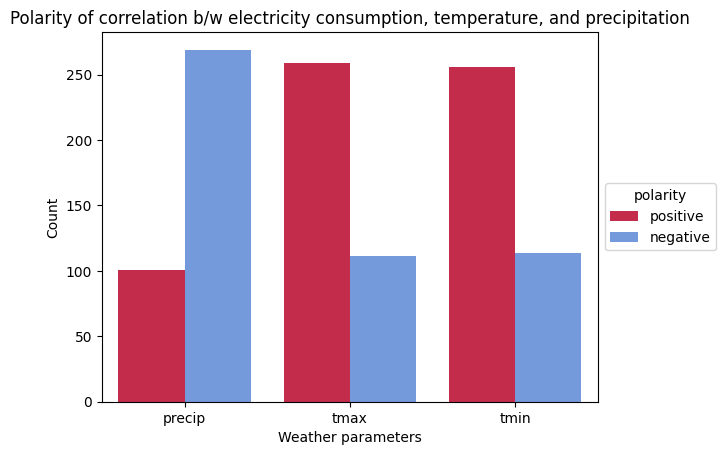

In [13]:
corr = pd.DataFrame.from_dict(agg)
corr_agg = corr[["feature", "sign"]].value_counts().reset_index()
ordinal_order = ["positive", "negative"]
colors = ["crimson", "cornflowerblue"]

palette = dict(zip(ordinal_order, colors))

sns.barplot(data = corr_agg, x = "feature", y = "count", 
            hue = "sign", palette = palette, 
            hue_order = ordinal_order)
plt.xlabel("Weather parameters")
plt.ylabel("Count")
plt.title("Polarity of correlation b/w electricity consumption, temperature, and precipitation")
plt.legend(title = "polarity", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# EDA 3: Stationarity of time series

# Consolidating the data

In [3]:
electricity = preprocess.preprocess_modelling(as_numpy=False, clustered=True, stationary=False)
temperature = preprocess.preprocess("temperature")
precipitation = preprocess.preprocess("precipitation")

In [4]:
electricity = electricity.drop(pd.to_datetime("2015-01-01"))

In [5]:
weather = temperature.merge(precipitation)

# The time-series (original)

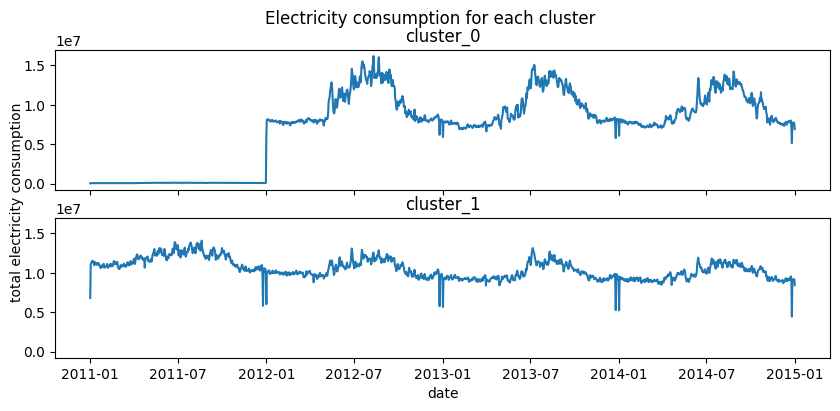

In [6]:
clusters = ["cluster_0", "cluster_1"]

fig, axs = plt.subplots(2, 1, figsize = (10, 4), 
                        sharex = True, sharey = True)

for i in range(0, len(clusters)):
    axs[i].plot(electricity[clusters[i]])
    axs[i].set_title(clusters[i])

plt.xlabel("date")
fig.text(0.08, 0.5, 'total electricity consumption', 
         va='center', rotation='vertical')
plt.suptitle("Electricity consumption for each cluster")
plt.show()

The time series for each cluster are not stationary but we can verify this with Augmented Dickey-Fuller test.

# Test for stationarity

In [12]:
test_res = adfuller(electricity["cluster_0"])

pprint.pprint(dict(zip(["test statistic", "p-value", 
            "used lags", "samples",
            "t-critical values",
            "information criterion"], test_res)))

{'information criterion': np.float64(41206.36180121677),
 'p-value': np.float64(0.3998314678325287),
 'samples': 1451,
 't-critical values': {'1%': np.float64(-3.4348647527922824),
                       '10%': np.float64(-2.567831568508802),
                       '5%': np.float64(-2.863533960720434)},
 'test statistic': np.float64(-1.7613115049630526),
 'used lags': 9}


In [13]:
test_res = adfuller(electricity["cluster_1"])

pprint.pprint(dict(zip(["test statistic", "p-value", 
            "used lags", "samples",
            "t-critical values",
            "information criterion"], test_res)))

{'information criterion': np.float64(41099.21400777679),
 'p-value': np.float64(0.47652336646294613),
 'samples': 1439,
 't-critical values': {'1%': np.float64(-3.4349024693573584),
                       '10%': np.float64(-2.5678404322793846),
                       '5%': np.float64(-2.8635506057382325)},
 'test statistic': np.float64(-1.612766797797905),
 'used lags': 21}


- In both cases, the p-value is greater than the alpha value (1%, 5%, and 10%). 
- Therefore, we fail to reject the null hypothesis which implies that there is non-stationarity in both the time series.

# Making the time series stationary

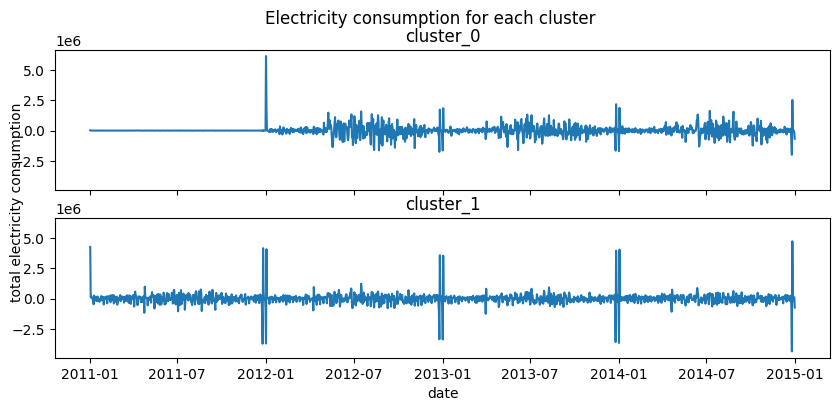

In [14]:
clusters = ["cluster_0", "cluster_1"]

fig, axs = plt.subplots(2, 1, figsize = (10, 4), 
                        sharex = True, sharey = True)

for i in range(0, len(clusters)):
    axs[i].plot(electricity[clusters[i]].diff())
    axs[i].set_title(clusters[i])

plt.xlabel("date")
fig.text(0.08, 0.5, 'total electricity consumption', 
         va='center', rotation='vertical')
plt.suptitle("Electricity consumption for each cluster")
plt.show()

These time-series appear to be relatively more stationary than the original time series but we can verify this using Augmented Dickey-Fuller test.

# Test for stationarity

In [15]:
test_res = adfuller(electricity["cluster_0"].diff()[1:])

pprint.pprint(dict(zip(["test statistic", "p-value", 
            "used lags", "samples",
            "t-critical values",
            "information criterion"], test_res)))

{'information criterion': np.float64(41179.88985328503),
 'p-value': np.float64(3.3553336201809103e-28),
 'samples': 1451,
 't-critical values': {'1%': np.float64(-3.4348647527922824),
                       '10%': np.float64(-2.567831568508802),
                       '5%': np.float64(-2.863533960720434)},
 'test statistic': np.float64(-15.386321421705444),
 'used lags': 8}


In [16]:
test_res = adfuller(electricity["cluster_1"].diff()[1:])

pprint.pprint(dict(zip(["test statistic", "p-value", 
            "used lags", "samples",
            "t-critical values",
            "information criterion"], test_res)))

{'information criterion': np.float64(41072.15348509664),
 'p-value': np.float64(2.3976346501284293e-20),
 'samples': 1439,
 't-critical values': {'1%': np.float64(-3.4349024693573584),
                       '10%': np.float64(-2.5678404322793846),
                       '5%': np.float64(-2.8635506057382325)},
 'test statistic': np.float64(-11.188792407931913),
 'used lags': 20}


- In both cases, the p-value is less than the alpha value (1%, 5%, and 10%). 
- Therefore, we can reject the null hypothesis which implies that the time series are now stationary.